# Importing All the Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data_set = pd.read_csv("./lin_train.csv")

In [3]:
untouched_data = pd.read_csv("./lin_train.csv")
untouched_cols = list(data_set._get_numeric_data())

In [4]:
data_set.head() # get first 5 rows to get an idea of the data

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
data_set.shape # 333 rows, 15 columns
ncols = (len(data_set.columns))
nrows = (len(data_set))

# Data Preprocessing

In [6]:
summary = data_set.describe()

In [7]:
type(summary) # this function gives you the data type of summary

pandas.core.frame.DataFrame

In [8]:
summary_mean = summary.loc["mean"]
summary_mean # gives average of all features

ID         250.951952
crim         3.360341
zn          10.689189
indus       11.293483
chas         0.060060
nox          0.557144
rm           6.265619
age         68.226426
dis          3.709934
rad          9.633634
tax        409.279279
ptratio     18.448048
black      359.466096
lstat       12.515435
medv        22.768769
Name: mean, dtype: float64

In [9]:
summary_std = summary.loc["std"]
summary_25percentile = summary.loc["25%"]
summary_75percentile = summary.loc["75%"]
summary_50percentile = summary.loc["50%"]

In [10]:
cols = list(data_set._get_numeric_data())
data_set[cols].columns # The column labels of the DataFrame

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

# Creating a Function for Finding Outliers

In [11]:
def findOutlier(data_set):
    outliers = []
    for value in data_set:
        if np.abs(value) > 3:
            outliers.append(value)
    return outliers

# Finding Outliers Through Z-Score

In [12]:
zscore_values = []
for value in range(ncols):
    for element in data_set[cols[value]]:
        zscore = (element-summary_mean[value])/summary_std[value]
        zscore_values.append(zscore)
print(zscore_values)

[-1.6904700549917024, -1.6837068749413355, -1.6701805148406017, -1.6634173347902348, -1.6498909746895012, -1.6228382544880335, -1.6160750744376666, -1.6093118943873, -1.602548714336933, -1.595785534286566, -1.5890223542361992, -1.5822591741858323, -1.5687328140850985, -1.5552064539843649, -1.548443273933998, -1.541680093883631, -1.5349169138332641, -1.5078641936317967, -1.487574653480696, -1.480811473430329, -1.4605219332792285, -1.4334692130777609, -1.426706033027394, -1.4199428529770273, -1.4064164928762934, -1.3996533128259265, -1.3928901327755596, -1.3861269527251927, -1.3793637726748258, -1.372600592624459, -1.3590742325237253, -1.3523110524733584, -1.3455478724229915, -1.3320215123222576, -1.325258332271891, -1.318495152221524, -1.3117319721711571, -1.3049687921207902, -1.2982056120704233, -1.2846792519696895, -1.2779160719193228, -1.264389711818589, -1.257626531768222, -1.2508633517178551, -1.2441001716674882, -1.2373369916171215, -1.2305738115667546, -1.2170474514660208, -1.203

In [13]:
findOutlier(zscore_values)

[4.759271597314621,
 3.440495548870118,
 5.764987947872912,
 3.0711947313436623,
 9.544499997602271,
 4.665436655501311,
 3.4977571769966542,
 3.277247694037247,
 3.938776142915469,
 3.0567382110778394,
 3.0567382110778394,
 3.0567382110778394,
 3.7182666599560616,
 3.166992952557543,
 3.7182666599560616,
 3.7182666599560616,
 3.4977571769966542,
 3.4977571769966542,
 3.0567382110778394,
 3.0567382110778394,
 3.0567382110778394,
 3.277247694037247,
 3.0567382110778394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.9500636707530394,
 3.49367977309938,
 3.0291591849334987,
 -3.84205208405233,
 -3.4130453023211493,
 -3.022393431539445,
 3.

# Finding and Replacing Outliers Through Inter-Quartile Range

In [14]:
for value in range(ncols):
    q1 = summary_25percentile[value]
    q3 = summary_75percentile[value]
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    a = np.array(data_set[cols[value]])
    p98 = np.nanpercentile(a, 98)
    p2 = np.nanpercentile(a, 2)
    for element in data_set[cols[value]]:
        if element < lower_bound:
            data_set.at[element, cols[value]] = p2
        elif value > upper_bound:
            data_set.at[element, cols[value]] = p98

# Distribution of Age Target Variable

In [15]:
# Let's look at Median House Price as a Target Variable
Medv_NoNull = data_set['medv'].dropna()

/Users/ishani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


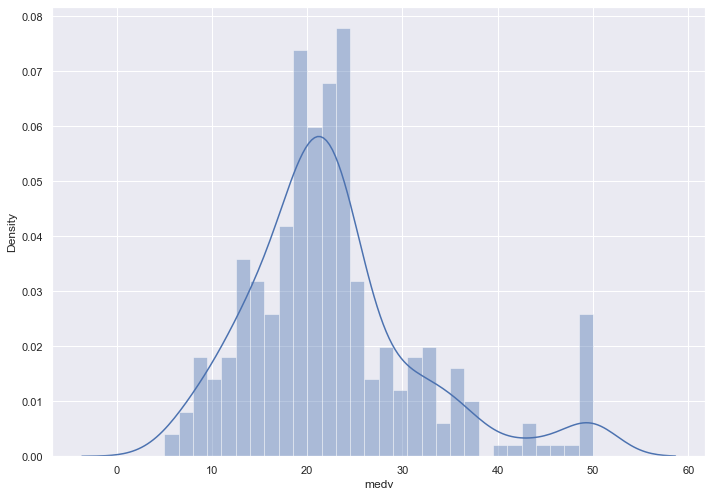

In [16]:
#visualization of the distribution of the target variable: Age
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Medv_NoNull, bins=30)
plt.show()

# Correlation Matrix Using Heatmaps

<AxesSubplot:>

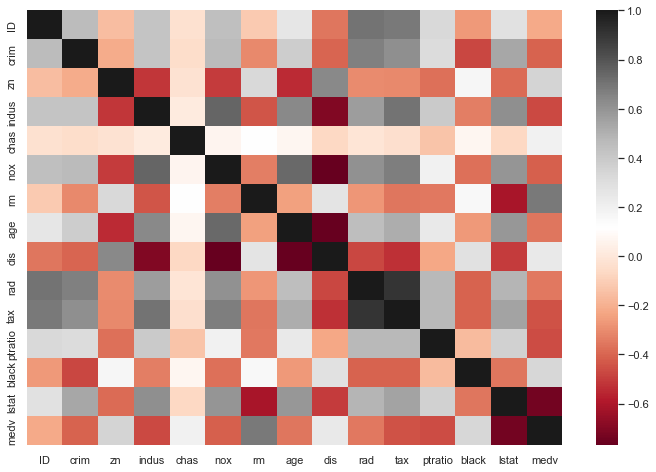

In [17]:
# Now lets take a look how the all variables relate to each other.

plt.subplots(figsize=(12,8))
sns.heatmap(data_set.corr(), cmap = 'RdGy')

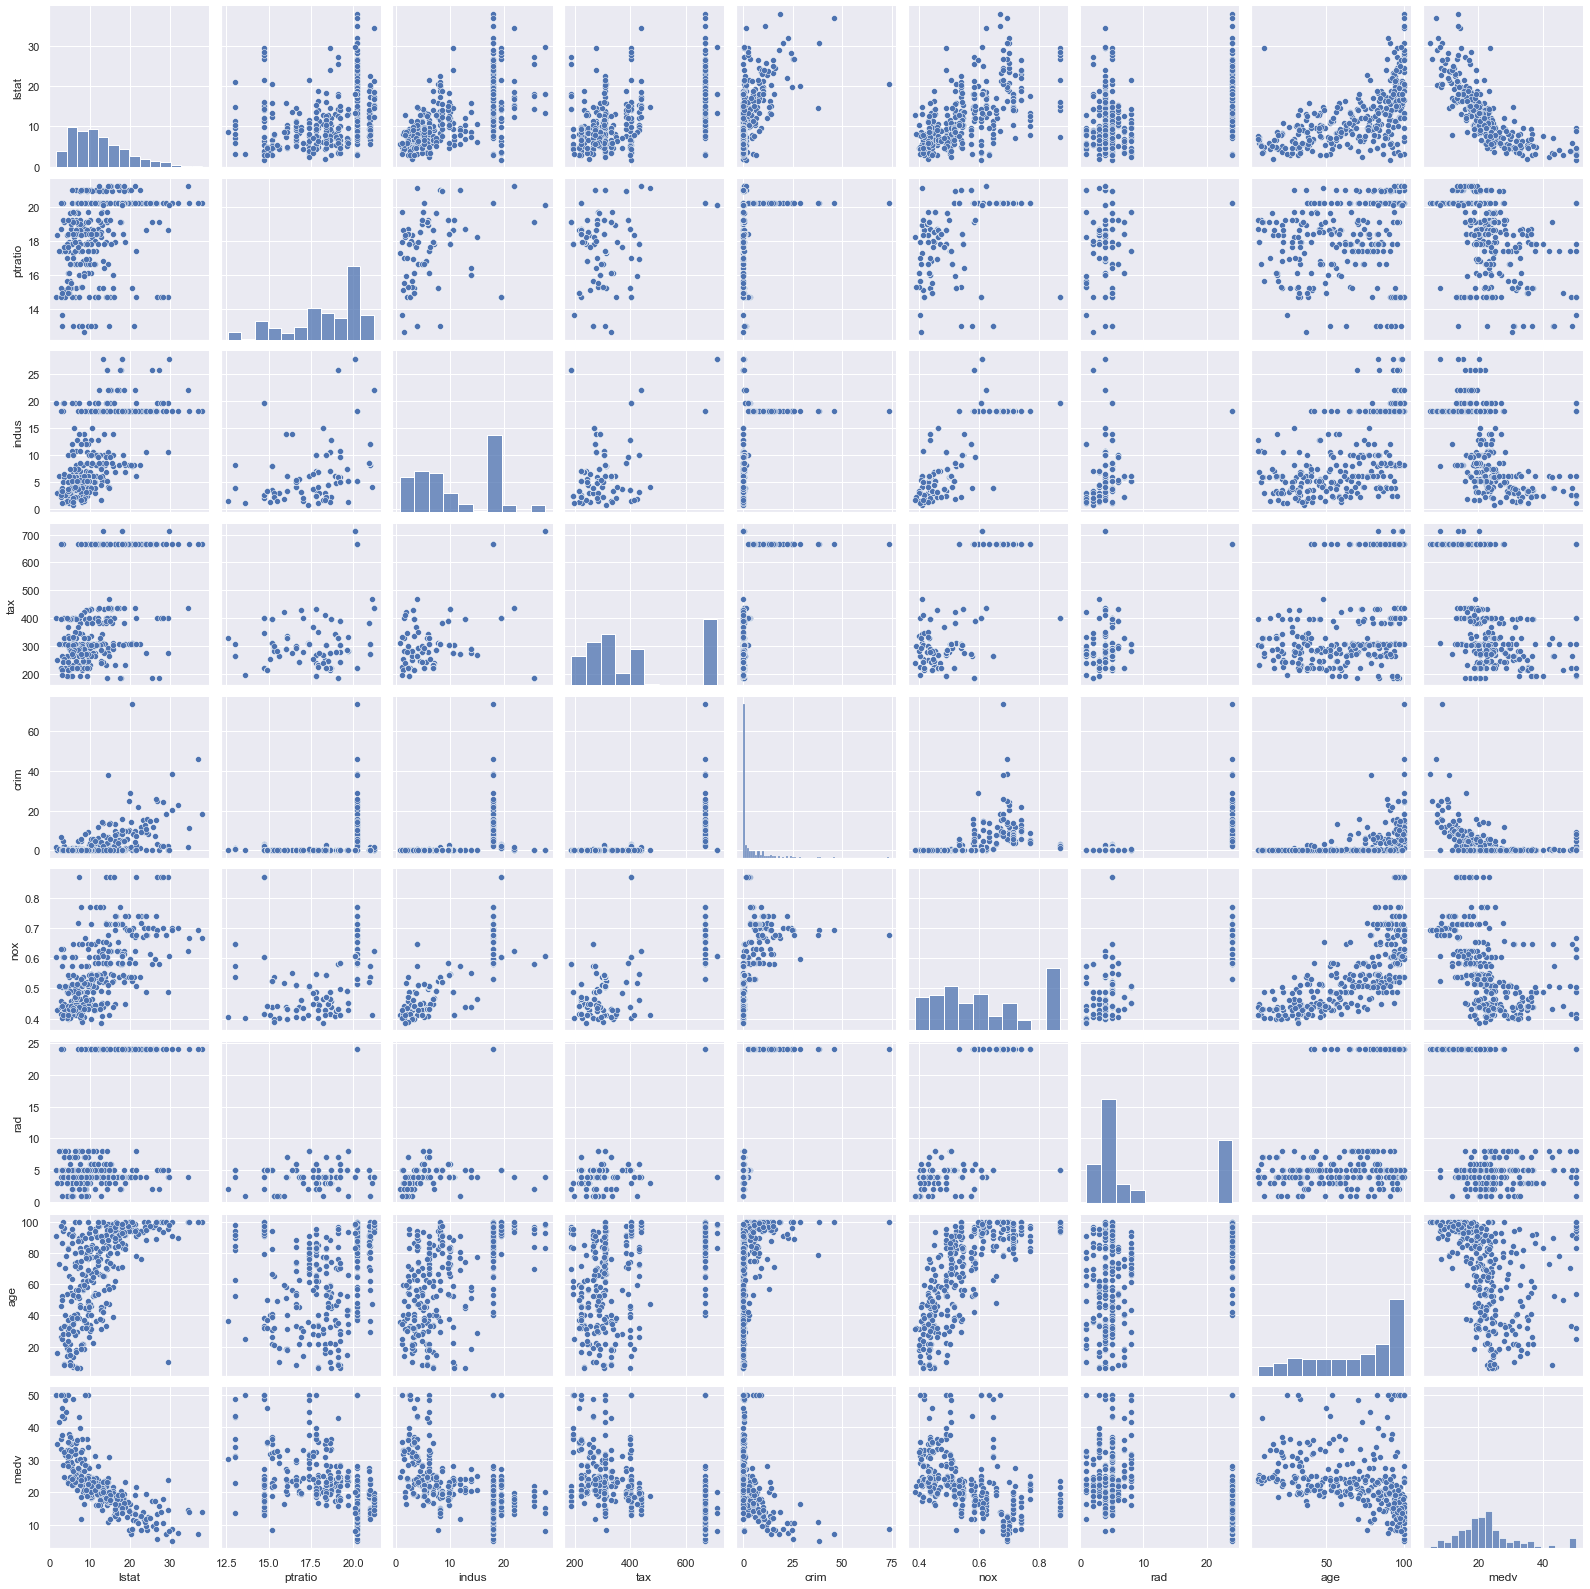

In [18]:
# Lets plot the paiplot, for all different correlations
# Look at all the correlations
sns.pairplot(data_set, vars = ['lstat', 'ptratio', 'indus', 'tax', 'crim', 'nox', 'rad', 'age', 'medv'])

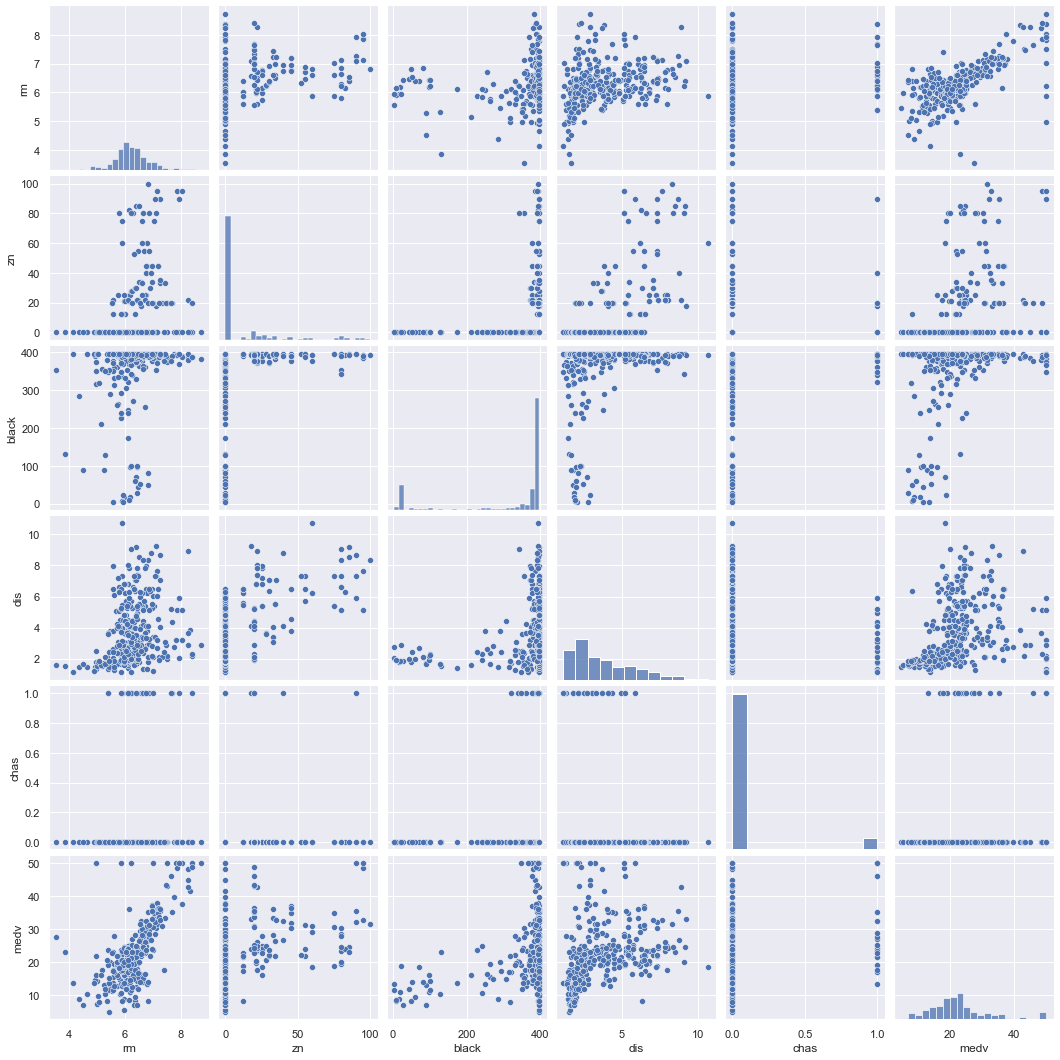

In [19]:
# Let's look at another one with these variable correlations
sns.pairplot(data_set, vars = ['rm', 'zn', 'black', 'dis', 'chas','medv'])

# Train LinReg Model

In [20]:
X = data_set[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = data_set['medv']

In [21]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [22]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [23]:
# convert the series -> df
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [24]:
clean_dataset(X_train)
clean_dataset(X_test)
clean_dataset(y_train)
clean_dataset(y_test)

/Users/ishani/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,medv
32.0,20.5
222.0,19.5
107.0,23.3
197.0,27.1
204.0,33.4
...,...
238.0,25.0
164.0,22.0
39.0,18.7
266.0,17.2


In [25]:
# convert back to series object
y_train = y_train.squeeze().drop(len(y_train)) # get the dimensions same as X_train
y_test = y_test.squeeze()

In [26]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Predicted Y')

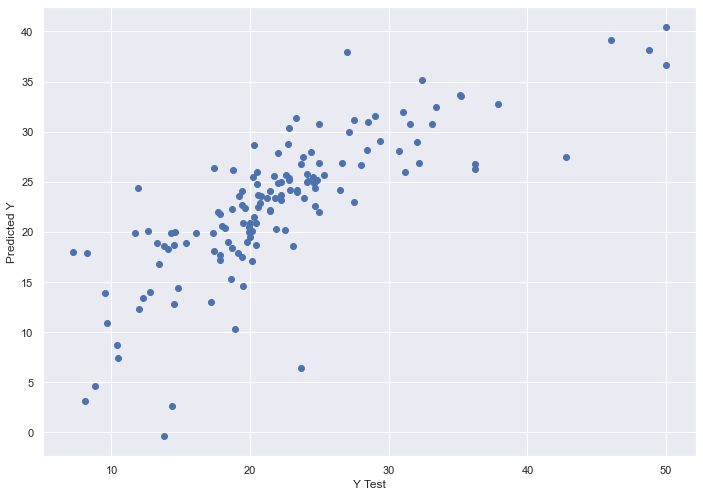

In [27]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')